# Appendix I - Orbits - impact parameter accuracy

PyTransit offers four methods to calculate the projected star-planet center distance ``z``. The methods differ in the way the eccentric anomaly is calculated (Newton's method, iteration, and two series-based methods), and have different accuracies and evaluation costs. The series-based methods are faster than the Newton's method or iteration, but work only for small eccentricities. 

This notebook characterises the error in the impact parameter of the four methods as a function of eccentricity and argument of periastron.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pytransit.utils.orbits as ou
from pytransit.orbits_f import orbits as of

In [45]:
resolution = 200

t, t0, p, a = 1.5, 1.5, 14, 6
es = linspace(0, 0.99, resolution)
ws = linspace(0, 2*pi, resolution)
bs = [0.0, 0.3, 0.6, 0.9]

In [51]:
E,W = meshgrid(es,ws)
Bn, Bi, B3, B5 = zeros_like(E), zeros_like(E), zeros_like(E), zeros_like(E)

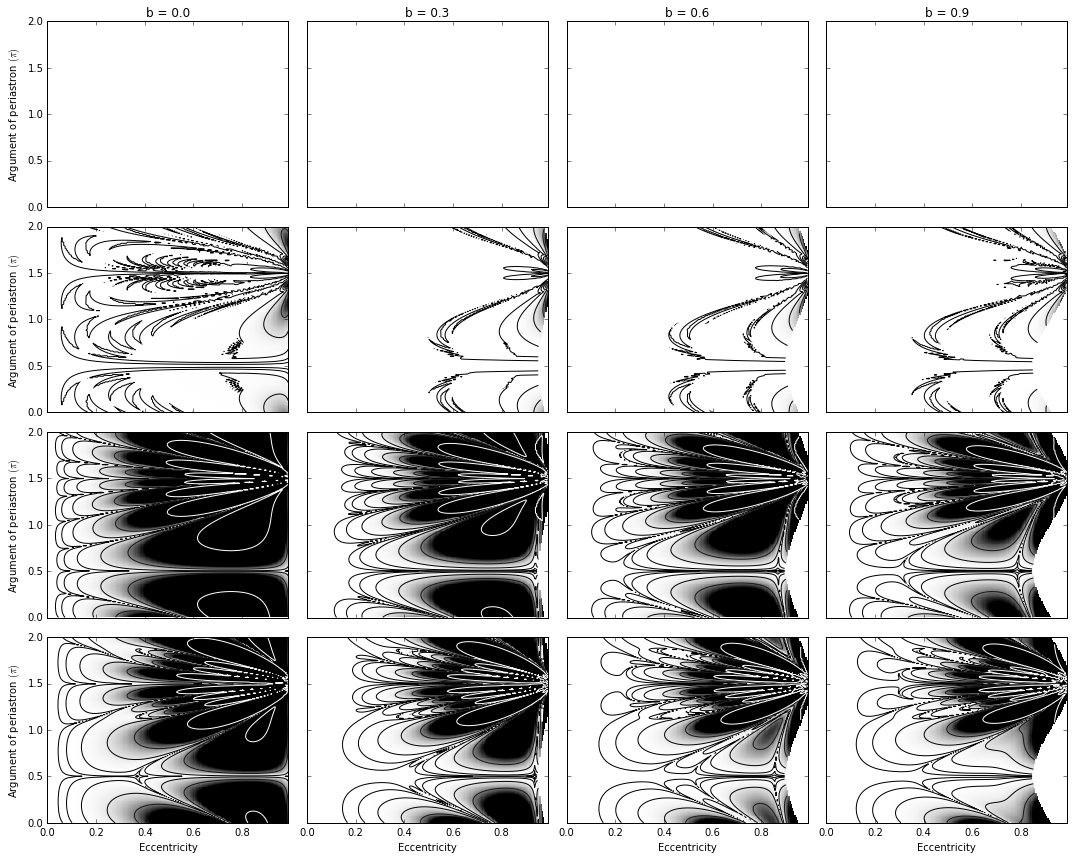

In [52]:
fig, axs = subplots(4,4, figsize=(15,12), sharex=True, sharey=True)

for j,b in enumerate(bs):
    for idx, (e,w) in enumerate(zip(E.flat, W.flat)):
        i = ou.i_from_baew(b, a, e, w)
        Bn.flat[idx] = of.z_eccentric_newton(t, t0, p, a, i, e, w, 1)
        Bi.flat[idx] = of.z_eccentric_iter(t, t0, p, a, i, e, w, 1)
        B3.flat[idx] = of.z_eccentric_ps3(t, t0, p, a, i, e, w, 1)
        B5.flat[idx] = of.z_eccentric_ps5(t, t0, p, a, i, e, w, 1)
        
    for i,B in enumerate((Bn, Bi, B3, B5)):
        axs[i,j].imshow(abs(B-b), origin='image', extent=(0,0.99,0,2), aspect='auto', 
                           interpolation='nearest', vmin=0, vmax=0.1, cmap=cm.gray_r)
        axs[i,j].contour(E, W/pi, abs(B-b), origin='image', cmap=cm.gray, 
                            levels=[1e-5, 1e-4, 1e-3, 1e-2, 0.05, 0.5])

[ax.set_title('b = {:2.1f}'.format(b)) for ax,b in zip(axs[0,:], bs)]
setp(axs[-1,:], xlabel='Eccentricity')
setp(axs[:,0], ylabel='Argument of periastron $(\pi)$')
fig.tight_layout()

---
<center>&copy; Hannu Parviainen 2016</center>